In [ ]:
'''import urllib.request as url
#dir_root = "https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/";
#years = ["2015","2016", "2017", "2018"];
#months = ["01","02","03","04","05","06","07","08","09","10","11","12"];
#days = ["01","02","03","04","05","06","07","08","09","10","11","12",
#       "13","14","15","16","17","18","19","20","21","22",
#       "23","24","25","26","27","28","29","30","31"];
#test_URL = dir_root + years[2] + "/" + months[3] + "/" + days[9];
#page = url.urlopen(test_URL);

#html = page.read();

frame_numbers = range(0,4000, 100);
mov_file = "https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2017/04/10/CAMHDA301-20170410T001500.mov";
frame = ca

In [14]:
%matplotlib inline
import pycamhd.pycamhd as camhd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xar
import urllib as url

logLink = "https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2017/03/12/CAMHDA301-20170312T000000.log"
movLink = "https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2017/03/12/CAMHDA301-20170312T181500.mov"

In [17]:
movAtom = camhd.get_moov_atom(movLink)
frames = camhd.get_frame_count(movLink, movAtom)
FPS = 30
#print("Total Frames: " + str(frames))             26983

logFile = url.request.urlopen(logLink)
logList = logFile.readlines()

sceneTimes = []
inMotion = False
timeSubstring = ""
startTime = 0
endTime = 0
#print(endTime - startTime)                        855
                     
index = 0;

while index < len(logList):
    line = logList[index]
    index+=1
    if (line[0] == ord('>')):
        line = line[1:]
    
    if "STOPPED:" in str(line):
        if inMotion:
            inMotion = False
        
    if "time" in str(line) and not inMotion:
        fullLine = str(line)
        timeSubstring = fullLine[fullLine.index("time"):]
        if ":" not in timeSubstring:
            break;
        timeSubstring = timeSubstring[timeSubstring.index(":") + 2:]
        if "}" in timeSubstring:
            timeSubstring = timeSubstring[0:timeSubstring.index("}")]
        if "," in timeSubstring:
            timeSubstring = timeSubstring[:timeSubstring.index(",")]
        timeSubstring = timeSubstring[:10]
        if int(timeSubstring) not in sceneTimes:
            sceneTimes.append(int(timeSubstring))
            endTime = int(timeSubstring)
    
    if "INMOTION:" in str(line):
        inMotion = True
        
    if "STARTED:" in str(line):
        startTime = int(timeSubstring)
        
index+=1
while index < len(logList):
    line = logList[index]
    index+=1
    if (line[0] == ord('>')):
        line = line[1:]
    
    if "STOPPED:" in str(line):
        if inMotion:
            inMotion = False
        
    if "time" in str(line) and not inMotion:
        fullLine = str(line)
        timeSubstring = fullLine[fullLine.index("time"):]
        if ":" not in timeSubstring:
            break;
        timeSubstring = timeSubstring[timeSubstring.index(":") + 2:]
        if "}" in timeSubstring:
            timeSubstring = timeSubstring[0:timeSubstring.index("}")]
        if "," in timeSubstring:
            timeSubstring = timeSubstring[:timeSubstring.index(",")]
        timeSubstring = timeSubstring[:10]
        if int(timeSubstring) not in sceneTimes:
            sceneTimes.append(int(timeSubstring))   
            endTime = int(timeSubstring)
    if "INMOTION:" in str(line):
        inMotion = True

#print(sceneTimes)
#print("start time:\t",startTime)
#print("end time:\t",endTime)

In [28]:
sceneShift = []
for time in sceneTimes:
    sceneShift.append(time-startTime)

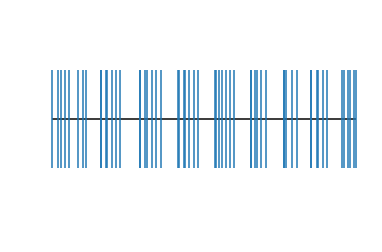

In [27]:
plt.figure()
plt.hlines(1,1,endTime-startTime)
plt.eventplot(sceneShift,orientation='horizontal')
plt.axis('off')
plt.show()

In [ ]:
frame = camhd.get_frame(movlink, 2640, 'rgb24')
fig, ax = plt.subplots()
im1 = ax.imshow(frame)